In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [7]:
iris = datasets.load_iris()
X= iris.data[:,:2]
y = iris.target

In [50]:
X_train = X[:120,:]
X_test = X[120:,:]
Y_train = y[:120]
Y_test = y[120:]


In [59]:
class RMS:

  def __init__(self, lr, epoch):
    self.lr = lr
    self.epoch = epoch

    self.theta = None


  def add_ones(self,X):
    #self.X = X
    X_new = np.hstack([np.ones((X.shape[0], 1)), X])
    return X_new

  def compute_cost(self, X, y):
    loss = (np.sum((X.dot(self.theta) - y) ** 2) )/ 2
    return loss

    
  def fitRMS(self,X,y,decay_factor = 0.9,  eps=0.0000001):
    m = len(y)
    # X = self.add_ones(X.values)
    self.theta = np.zeros(X.shape[1])
    self.cost_history = np.zeros(self.epoch)

    
    E = [0 for _ in range(len(self.theta))]
    for i in range(self.epoch):

      # Update E and the model weights iteratively (Note: speed up could be gained from vectorized implementation)
      for idx, gradient in enumerate(X.T @ (X @ self.theta - y)):    
        E[idx] = decay_factor*E[idx] + (1 - decay_factor)*(gradient**2)
        self.theta[idx] = self.theta[idx] - (self.lr/np.sqrt(E[idx] + eps))*gradient

        self.cost_history[i] = self.compute_cost(X, y)

    return self.theta, self.cost_history

  def predict(self, X):
    ypred = np.dot(X,self.theta)
    return ypred
    

  def mse(self, y,yPred):
    mse =  np.sum((yPred - y) ** 2 ) / 2
    return mse

  def Plot(self,loss_history):
    plt.figure()
    plt.plot(np.arange(self.epoch), loss_history, c='green')
    plt.xlabel('Iterations')
    plt.ylabel('Cost, ' + r'$J(\theta)$')
    return 
    
  def accuracy(self,ytrue,ypred):
    acc = np.sum(np.equal(ytrue,ypred)) / len(ytrue)
    return acc


In [215]:
rms = RMS(1e-4,2000)

In [216]:
_,loss_history1 = rms.fitRMS(X_train,Y_train)

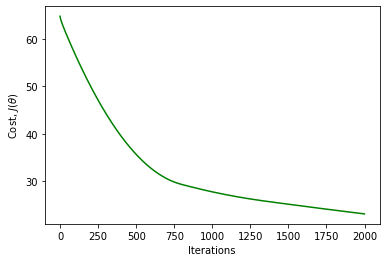

In [217]:
rms.Plot(loss_history1)

In [171]:
class Adam:
  def __init__(self, lr, epoch):
    self.lr = lr
    self.epoch = epoch

    self.theta = None

  def add_ones(self,X):
    X_new = np.hstack([np.ones((X.shape[0], 1)), X])
    return X_new

  def compute_cost(self, X, y):
    loss = float((np.sum((X.dot(self.theta) - y) ** 2) ))/ 2
    return loss

    
  def fitAdam(self,X,y,b1 = 0.9, b2 = 0.999,  eps=0.0000001):
    X = self.add_ones(X)
    self.theta = np.zeros(X.shape[1])
    self.cost_history = np.zeros(self.epoch)

    
    # Variable Initialization
    num_param = len(self.theta)
    m = [0 for _ in range(num_param)] # two m for each parameter
    v = [0 for _ in range(num_param)] # two v for each parameter
    g = [0 for _ in range(num_param)] # two gradient
    
    for t in range(1,self.epoch): 
      # Get the partial derivatives
      g = (X.T @ (X @ self.theta - y))

      # Update the m and v parameter
      m = [b1*m_i + (1 - b1)*g_i for m_i, g_i in zip(m, g)]
      v = [b2*v_i + (1 - b2)*(g_i**2) for v_i, g_i in zip(v, g)]

      # Bias correction for m and v
      m_cor = [m_i / (1 - (b1**t)) for m_i in m]
      v_cor = [v_i / (1 - (b2**t)) for v_i in v]

      # Update the parameter
      self.theta = [theta - (self.lr / (np.sqrt(v_cor_i) + eps))*m_cor_i for theta, v_cor_i, m_cor_i in zip(self.theta, v_cor, m_cor)]
      
      self.cost_history[t] = self.compute_cost(X, y)

    return self.theta, self.cost_history


  

  def predict(self, X):
    X = self.add_ones(X)
    ypred = np.dot(X,self.theta)
    return ypred
    

  def mse(self, y,yPred):
    mse =  np.sum((yPred - y) ** 2 ) / 2
    return mse

  def Plot(self,loss_history):
    plt.figure()
    plt.plot(np.arange(self.epoch), loss_history, c='green')
    plt.xlabel('Iterations')
    plt.ylabel('Cost, ' + r'$J(\theta)$')
    return 
  
  def accuracy(self,ytrue,ypred):
    acc = np.sum(np.equal(ytrue,ypred)) / len(ytrue)
    return acc


In [212]:
adam = Adam(1e-4,2000)

In [213]:
_,loss_history2 = adam.fitAdam(X_train,Y_train)

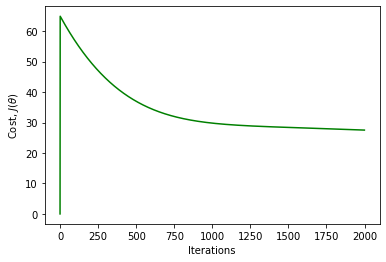

In [214]:
adam.Plot(loss_history2)

In [99]:
class Adagrad:
  def __init__(self, lr, epoch):
    self.lr = lr
    self.epoch = epoch

    self.theta = None
  

  def add_ones(self,X):
    X_new = np.hstack([np.ones((X.shape[0], 1)), X])
    return X_new

  def compute_cost(self, X, y):
    loss = float((np.sum((X.dot(self.theta) - y) ** 2) ))/ 2
    return loss

    
            
  def fitadagrad(self,X, y, eps=0.0000001):
    m = len(y)
    X = self.add_ones(X)
    self.theta = np.zeros(X.shape[1])
    self.cost_history = np.zeros(self.epoch)
    
    # Here only the diagonal matter
    num_param = len(self.theta)
    G = [[0 for _ in range(num_param)] for _ in range(num_param)]
    
    for i in range(self.epoch):
        # Update G and the model weights iteratively (Note: speed up could be gained from vectorized implementation)
        for idx, gradient in enumerate((X.T @ (X @ self.theta - y))):
            G[idx][idx] = G[idx][idx] + gradient**2
            self.theta[idx] = self.theta[idx] - (self.lr / np.sqrt(G[idx][idx] + eps)) * gradient
      
        self.cost_history[i] = self.compute_cost(X, y)

    return self.theta, self.cost_history


  def predict(self, X,theta):
    X = self.add_ones(X)
    ypred = np.dot(X,self.theta)
    return ypred
    

  def mse(self, y,yPred):
    mse =  np.sum((yPred - y) ** 2 ) / 2
    return mse

  def Plot(self,loss_history):
    plt.figure()
    plt.plot(np.arange(self.epoch), loss_history, c='green')
    plt.xlabel('Iterations')
    plt.ylabel

  def accuracy(self,ytrue,ypred):
    acc = np.sum(np.equal(ytrue,ypred)) / len(ytrue)
    return acc


In [209]:
adagrad = Adagrad(1e-4,2000)

In [210]:
theta,loss_history3 = adagrad.fitadagrad(X_train,Y_train)

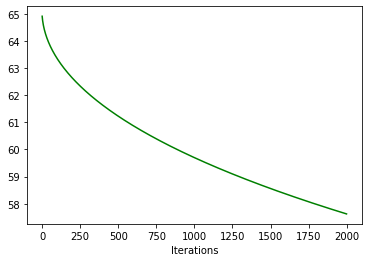

In [211]:
adagrad.Plot(loss_history3)

In [111]:
class Adadelta:
  def __init__(self, lr, epoch):
    self.lr = lr
    self.epoch = epoch

    self.theta = None

  

  def add_ones(self,X):
    X_new = np.hstack([np.ones((X.shape[0], 1)), X])
    return X_new

  def compute_cost(self, X, y):
    loss = float((np.sum((X.dot(self.theta) - y) ** 2) ))/ 2
    return loss

    
            
  def fitadadelta(self, X, y, decay_factor = 0.9, eps=0.0000001):
    X = self.add_ones(X)
    self.theta = np.zeros(X.shape[1])
    self.cost_history = np.zeros(self.epoch)        
      
    # Init Running Averages
    num_param = len(self.theta)
    E_g = [0 for _ in range(num_param)]
    E_p = [0 for _ in range(num_param)]
    delta_p = [0 for _ in range(num_param)]
    
    
    for i in range(self.epoch):
      for idx, gradient in enumerate((X.T @ (X @ self.theta - y))):
        # Get the running average for the gradient
        E_g[idx] = decay_factor*E_g[idx] + (1 - decay_factor)*(gradient**2)
        
        # Get the running average for the parameters
        E_p[idx] = decay_factor*E_p[idx] + ((1 - decay_factor)*(delta_p[idx]**2))
        
        # Calculate the gradient difference
        delta_p[idx] = - np.sqrt(E_p[idx] + eps) / np.sqrt(E_g[idx] + eps) * gradient
        
        # update the model weight
        self.theta[idx] = self.theta[idx] + delta_p[idx]

        self.cost_history[i] = self.compute_cost(X, y)

    return self.theta, self.cost_history

  def predict(self, X):
    X = self.add_ones(X)
    ypred = np.dot(X,self.theta)
    return ypred
    

  def mse(self, y,yPred):
    mse =  np.sum((yPred - y) ** 2 ) / 2
    return mse

  def Plot(self,loss_history):
    plt.figure()
    plt.plot(np.arange(self.epoch), loss_history, c='green')
    plt.xlabel('Iterations')
    plt.ylabel

In [206]:
adadelta = Adadelta(1e-4, 2000)

In [207]:
_,loss_history4 = adadelta.fitadadelta(X_train,Y_train)

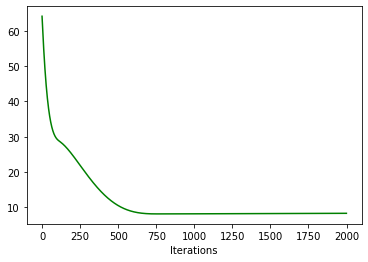

In [208]:
adadelta.Plot(loss_history4)

In [121]:
class Momentum:
  def __init__(self, lr, epoch):
    self.lr = lr
    self.epoch = epoch

    self.theta = None

  

  def add_ones(self,X):
    X_new = np.hstack([np.ones((X.shape[0], 1)), X])
    return X_new

  def compute_cost(self, X, y):
    loss =((np.sum((X.dot(self.theta) - y) ** 2) ))/ 2
    return loss

    
            
  def fitmomentun(self, X, y, decay_factor = 0.9):
    X = self.add_ones(X)
    self.theta = np.zeros(X.shape[1])
    self.cost_history = np.zeros(self.epoch)       

    gradients = [0 for _ in range(len(self.theta))]
    
    for i in range(self.epoch):

        # Calculate the new gradients
        gradients = [(decay_factor * g) + (self.lr * derivative) for g, derivative in zip(gradients, (X.T @ (X @ self.theta - y)))]
        
        # Updating the model parameters
        self.theta = [theta - g for theta, g in zip(self.theta, gradients)]

        self.cost_history[i] = self.compute_cost(X, y)

    return self.theta, self.cost_history

  def predict(self, X):
    X = self.add_ones(X)
    ypred = np.dot(X,self.theta)
    return ypred
    

  def mse(self, y,yPred):
    mse =  np.sum((yPred - y) ** 2 ) / 2
    return mse

  def Plot(self,loss_history):
    plt.figure()
    plt.plot(np.arange(self.epoch), loss_history, c='green')
    plt.xlabel('Iterations')
    plt.ylabel



  def accuracy(self,ytrue,ypred):
    acc = np.sum(np.equal(ytrue,ypred)) / len(ytrue)
    return acc






In [203]:
moment = Momentum(1e-4,2000)

In [204]:
_,loss_history5 = moment.fitmomentun(X_train, Y_train)

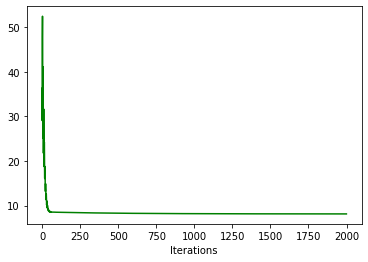

In [205]:
moment.Plot(loss_history5)

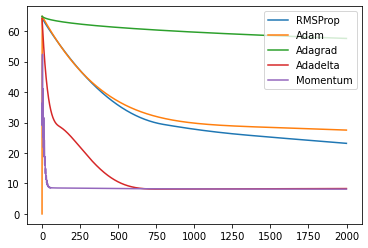

In [218]:
epochs = np.arange(2000)
plt.plot(epochs, loss_history1, label = "RMSProp")
plt.plot(epochs, loss_history2, label = "Adam")
plt.plot(epochs, loss_history3, label = "Adagrad")
plt.plot(epochs, loss_history4, label = "Adadelta")
plt.plot(epochs, loss_history5, label = "Momentum")
plt.legend()
plt.show()